In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

## Linearly Seperable Data

In [3]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,
                          n_clusters_per_class=1,
                          n_redundant=0,random_state=15)

<Axes: xlabel='Feature1', ylabel='Feature2'>

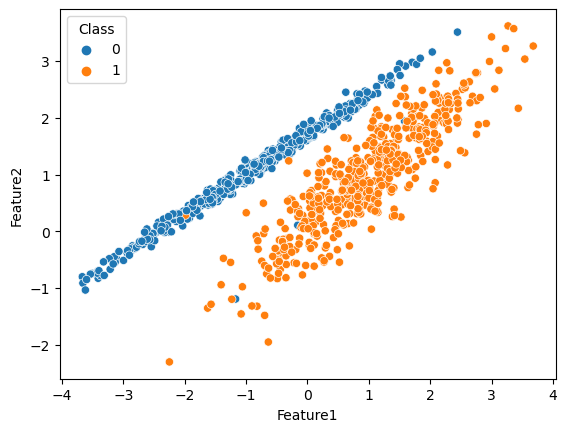

In [4]:
# Convert to DataFrame for easier plotting
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Class'] = y

# Plot using seaborn
sns.scatterplot(x='Feature1', y='Feature2', hue='Class', data=df)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

In [6]:
from sklearn.svm import SVC

In [7]:
svc = SVC(kernel = 'linear')

In [8]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [9]:
## prediction
y_pred = svc.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.992
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       132
           1       1.00      0.98      0.99       118

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[132   0]
 [  2 116]]


Here we get <b>high accuracy </b>because our datapoints will be <b>clearly linearly seperable</b> so we use <b>linear = kernel</b>

If we have dataset which is <b>not linearly seperable</b> then it will <b>not give high accuracy, it gives low accuracy</b>

## Non Linearly Seperable Data

In [11]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,
                          n_clusters_per_class=2,
                          n_redundant=0,random_state=42)

<Axes: xlabel='Feature1', ylabel='Feature2'>

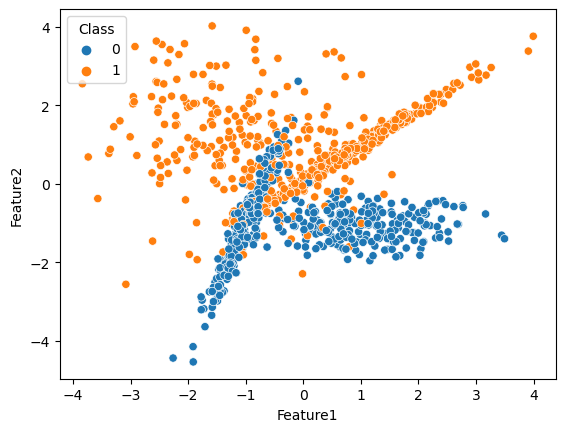

In [12]:
# Convert to DataFrame for easier plotting
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Class'] = y

# Plot using seaborn
sns.scatterplot(x='Feature1', y='Feature2', hue='Class', data=df)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

In [14]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [15]:
## prediction
y_pred = svc.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.872
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       125
           1       0.86      0.89      0.87       125

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250

[[107  18]
 [ 14 111]]


So here if we use <b>kernel = 'linear'</b> for non linearly seperable dataset then it may give <b>less accuracy</b>

so we use <b> different-different kernel</b> for this kind of dataset

better performance:  <b> RBF > Poly > sigmoid > Linear  </b>

### RBF Kernel

In [17]:
svc = SVC(kernel = 'rbf')
svc.fit(X_train,y_train)

## prediction
y_pred = svc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.888
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       133
           1       0.84      0.93      0.89       117

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250

[[113  20]
 [  8 109]]


### Poly Kernel

In [18]:
svc = SVC(kernel = 'poly')
svc.fit(X_train,y_train)

## prediction
y_pred = svc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.88
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       113
           1       0.91      0.86      0.89       137

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[102  11]
 [ 19 118]]


### Sigmoid Kernel

In [19]:
svc = SVC(kernel = 'sigmoid')
svc.fit(X_train,y_train)

## prediction
y_pred = svc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.792
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       111
           1       0.84      0.78      0.81       139

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.80      0.79      0.79       250

[[ 90  21]
 [ 31 108]]


# Hyper-Parameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV
params = {'C': [0.1,1,10,100,1000],
         'gamma': [1,0.1,0.01,0.001,0.0001],
         'kernel':['rbf','poly','linear','sigmoid']
         }

In [21]:
grid = GridSearchCV(SVC(),param_grid = params, cv=5,verbose=3,refit=True)

In [22]:
grid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             verbose=3)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.880 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.780 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.840 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.880 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.860 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.893 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linea

[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.873 total time=   0.0s
[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.793 total time=   0.0s
[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=0.840 total time=   0.0s
[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.887 total time=   0.0s
[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.860 total time=   0.0s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.813 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.893 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 1/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.713 total time=   0.0s
[CV 2/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=1, gamm

[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=0.887 total time=   0.0s
[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.867 total time=   0.0s
[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.813 total time=   0.0s
[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 1/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.713 total time=   0.0s
[CV 2/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.640 total time=   0.0s
[CV 3/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.680 total time=   0.0s
[CV 4/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.600 total time=   0.0s
[CV 5/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.653 total time=   0.0s
[CV 1/5] END .......C=10, ga

[CV 2/5] END .....C=100, gamma=1, kernel=linear;, score=0.813 total time=   0.0s
[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 4/5] END .....C=100, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 5/5] END .....C=100, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 1/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.713 total time=   0.0s
[CV 2/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.633 total time=   0.0s
[CV 3/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.680 total time=   0.0s
[CV 4/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.600 total time=   0.0s
[CV 5/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.653 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 4/5] END ......C=100, ga

[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.887 total time=   0.7s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.833 total time=   0.7s
[CV 1/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.713 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.633 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.680 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.600 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.653 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ....C=1000, gam

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             verbose=3)

In [24]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [25]:
grid.best_score_

0.9013333333333333

In [26]:
## prediction
y_pred = grid.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.932
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       132
           1       0.89      0.97      0.93       118

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.94      0.93      0.93       250

[[118  14]
 [  3 115]]
